In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

import plotly
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [2]:
#Import the data
one_star_df = pd.read_csv('data/one-star-michelin-restaurants.csv')
two_star_df = pd.read_csv('data/two-stars-michelin-restaurants.csv')
three_star_df = pd.read_csv('data/three-stars-michelin-restaurants.csv')

#Add column 'stars' to note number of michelin stars each restaurant has
one_star_df['stars'] = 1
two_star_df['stars'] = 2
three_star_df['stars'] = 3


#Create main dataframe containing all restaurants and star label
frames = [one_star_df, two_star_df, three_star_df]
df = pd.concat(frames).reset_index().drop(labels='index', axis=1)
df

,name,year,latitude,longitude,city,region,zipCode,cuisine,price,url,stars
0,Kilian Stuba,2019,47.348580,10.171140,Kleinwalsertal,Austria,87568,Creative,$$$$$,https://guide.michelin.com/at/en/vorarlberg/kl...,1
1,Pfefferschiff,2019,47.837870,13.079170,Hallwang,Austria,5300,Classic cuisine,$$$$$,https://guide.michelin.com/at/en/salzburg-regi...,1
2,Esszimmer,2019,47.806850,13.034090,Salzburg,Austria,5020,Creative,$$$$$,https://guide.michelin.com/at/en/salzburg-regi...,1
3,Carpe Diem,2019,47.800010,13.040060,Salzburg,Austria,5020,Market cuisine,$$$$$,https://guide.michelin.com/at/en/salzburg-regi...,1
4,Edvard,2019,48.216503,16.368520,Wien,Austria,1010,Modern cuisine,$$$$,https://guide.michelin.com/at/en/vienna/wien/r...,1
...,...,...,...,...,...,...,...,...,...,...,...
690,Fat Duck,2019,51.508280,-0.702320,Bray,United Kingdom,SL6 2AQ,Creative,NaN,https://guide.michelin.com/gb/en/buckinghamshi...,3
691,Waterside Inn,2019,51.507730,-0.701210,Bray,United Kingdom,SL6 2AT,Classic French,NaN,https://guide.michelin.com/gb/en/buckinghamshi...,3
692,Alain Ducasse at The Dorchester,2019,51.507120,-0.152520,Mayfair,United Kingdom,W1K 1QA,French,NaN,https://guide.michelin.com/gb/en/greater-londo...,3
693,The Araki,2019,51.511826,-0.140389,Mayfair,United Kingdom,W1S 3BF,Japanese,NaN,https://guide.michelin.com/gb/en/greater-londo...,3


In [3]:
print('Number of Rows: ', df.shape[0])
print('Number of Columns: ', df.shape[1])
print('Missing Values: ')
df.isnull().sum()

Number of Rows:  695
Number of Columns:  11
Missing Values: 


name           0
year           0
latitude       0
longitude      0
city           2
region         0
zipCode      194
cuisine        0
price        176
url            0
stars          0
dtype: int64

In [4]:
#Drop unneeded columns 
df = df.drop(labels=['zipCode', 'url'], axis=1)

In [5]:
#Replace price data with integer of count
def split_word(word):
    return [char for char in word]

int_price = []
cat_price = df[['price']].values.tolist()

for i in cat_price:
    if i[0] is not np.nan:
        token = split_word(i[0])
        int_price.append([int(len(token))])
    else:
        #Set price = -1 if the value of price was missing 
        int_price.append([int(-1)])
df[['price']] = int_price
df

,name,year,latitude,longitude,city,region,cuisine,price,stars
0,Kilian Stuba,2019,47.348580,10.171140,Kleinwalsertal,Austria,Creative,5,1
1,Pfefferschiff,2019,47.837870,13.079170,Hallwang,Austria,Classic cuisine,5,1
2,Esszimmer,2019,47.806850,13.034090,Salzburg,Austria,Creative,5,1
3,Carpe Diem,2019,47.800010,13.040060,Salzburg,Austria,Market cuisine,5,1
4,Edvard,2019,48.216503,16.368520,Wien,Austria,Modern cuisine,4,1
...,...,...,...,...,...,...,...,...,...
690,Fat Duck,2019,51.508280,-0.702320,Bray,United Kingdom,Creative,-1,3
691,Waterside Inn,2019,51.507730,-0.701210,Bray,United Kingdom,Classic French,-1,3
692,Alain Ducasse at The Dorchester,2019,51.507120,-0.152520,Mayfair,United Kingdom,French,-1,3
693,The Araki,2019,51.511826,-0.140389,Mayfair,United Kingdom,Japanese,-1,3


In [6]:
#Since only 2 cities are missing, these values can be filled manually
df1 = df[df['city'].isna() == True]
df1
#Épure is located in Tsmin Sha Tsui
#Arbor is located in "Central" Hong Kong

,name,year,latitude,longitude,city,region,cuisine,price,stars
152,Épure,2019,22.295830,114.169304,NaN,Hong Kong,French,3,1
166,Arbor,2019,22.283146,114.155420,NaN,Hong Kong,Innovative,3,1


In [7]:
#Manually change these values in the dataframe
df.loc[df['name'] == 'Arbor', ['city']] = 'Central'
df.loc[df['name'] == 'Épure', ['city']] = 'Tsmin Sha Tsui'

## Exploratory Data Analysis

In [8]:
#Plot Restaurants by region
labels = {'region': 'Region', 'stars': 'Michelin Stars'}
fig = px.bar(df, x='region', y='stars', color='stars', title='Michelin Star Restaurant Counts by Region', labels=labels)
fig.update_layout(barmode='stack', xaxis={'categoryorder':'total descending'})
fig.update_yaxes(title='Restaurant Count')
#plotly.offline.plot(fig, filename='fig.html')
fig.show()

In [9]:
#Proportion of regions with michelin star restaurants
fig0 = px.pie(df, names='region', 
              title='Proportion of Regions with Michelin Star Restaurants',
             hover_data = ['region'])
fig0.update_traces(textposition = 'inside', textinfo='percent+label')
#plotly.offline.plot(fig0, filename='fig0.html')
fig0.show()

In [10]:
#Proportion of number of michelin stars in michelin star restaurants

fig1 = px.pie(df[['stars']].value_counts(), 
              values=df[['stars']].value_counts().array, 
              names=['1 Michelin Star', '2 Michelin Stars', '3 Michelin Stars'],
              title = 'Number of Michelin Stars per Restaurant') 
fig1.update_traces(textposition='inside', textinfo='percent+label')
#plotly.offline.plot(fig1, filename='fig1.html')
fig1.show()

In [11]:
#Top 20 cities with the most restuarants with michelin stars
fig2 = px.bar(df, x='city', y='stars', color='stars', title='Top 20 Cities with Michelin Star Restaurants',
             labels=dict(city='City', stars='Michelin Stars'))
fig2.update_layout(barmode='stack', xaxis={'categoryorder':'total descending'})
fig2.update_yaxes(title='Restaurant Count')
fig2.update_xaxes(range = [0,19])
#plotly.offline.plot(fig2, filename='fig2.html')
fig2.show()

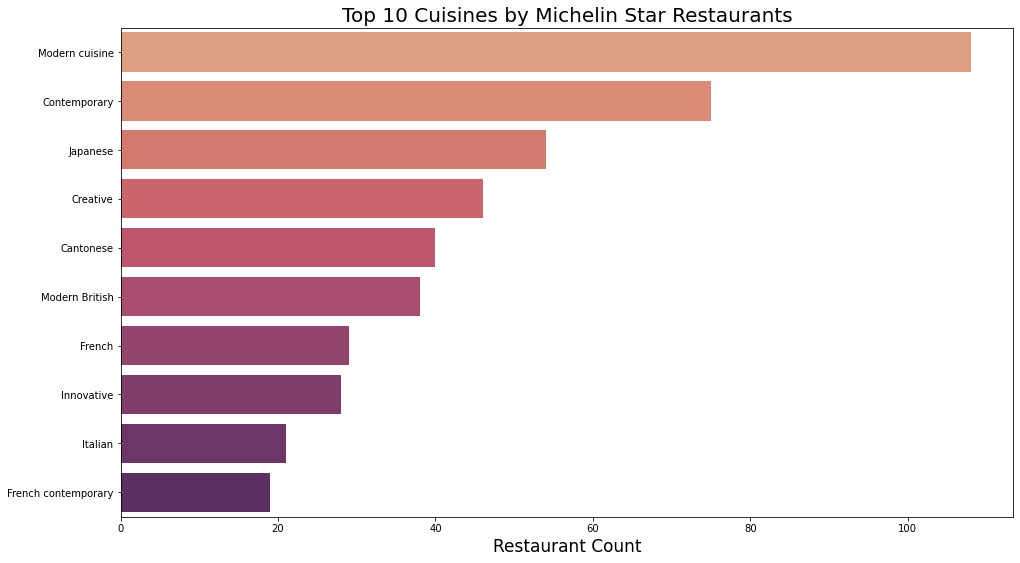

In [12]:
#Restaurant count by cuisine
fig3, ax = plt.subplots(figsize=(16,9))
plt.title('Top 10 Cuisines by Michelin Star Restaurants', fontsize=20)
sns.barplot(x=df.cuisine.value_counts()[:10], y=df.cuisine.value_counts()[:10].index, palette='flare')
plt.xlabel('Restaurant Count', fontsize=17)
plt.savefig('cuisine_count.png')

In [13]:
#Distribution/heatmap of cuisine by region 
df_C = df[['cuisine', 'region']]
x=[]
y=[]
for i in (df_C.value_counts().index.tolist()):
    x.append(i[1])
    y.append(i[0])
    
z = df_C.value_counts().tolist()
fig4 = go.Figure(data=go.Heatmap(dict(x=x, y=y, z=z), colorscale='viridis'))
fig4.update_layout(title='Distribution of Michelin Star Restaurants Cuisine by Region',
                  xaxis_title='Region',
                  yaxis_title='Cuisine')
#plotly.offline.plot(fig4, filename='fig4.html')
fig4.show()

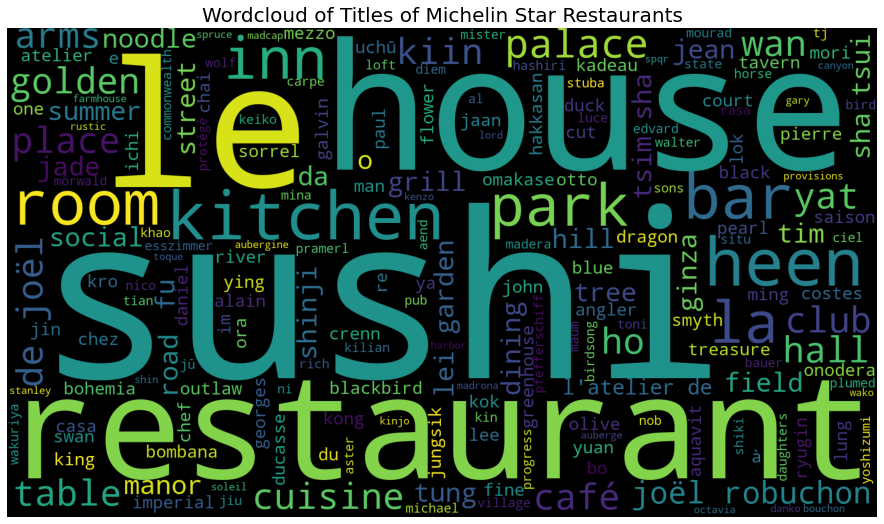

In [14]:
#Create wordcloud from restaurant titles  
restaurant_words = ''
stopwords = set(STOPWORDS)

for val in df.name:
    val = str(val)
    tokens = val.split()
    
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
        
    restaurant_words += " ".join(tokens)+" "
    
wordcloud = WordCloud(width=1600, height=900,
                     background_color = 'black',
                     stopwords = stopwords,
                     min_font_size=10).generate(restaurant_words)

plt.figure(figsize=(16,9))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Wordcloud of Titles of Michelin Star Restaurants', fontsize=20)
plt.savefig('wordcloud.png')

In [15]:
#Visualize restaurants on world map 

fig5 = px.scatter_geo(df, lat='latitude', lon='longitude', 
                     color='stars', 
                     hover_data=['name','city', 'region'], 
                     projection='robinson', size='stars', size_max=12, width=1600, height=900, 
                     title='Michelin Star Restaurants by Location')
#plotly.offline.plot(fig5, filename='fig5.html')
fig5.show()

## Missing Price Data

In [21]:
#Work with missing price data
value = [df.price.value_counts()[-1], len(df) - df.price.value_counts()[-1]]
label = ['Missing Values', 'Existing Values']
fig6 = go.Figure(data=[go.Pie(labels=label, values=value)])
fig6.update_layout(title='Proportion of Missing Price Values in Dataset')
fig6.update_traces(textposition='inside', textinfo='percent+label')
#plotly.offline.plot(fig6, filename='fig6.html')
fig6.show()

In [22]:
df_non_null = df[df['price']!= -1]
price = dict(df_non_null['price'].value_counts())



fig7 = px.pie(df_non_null['price'].value_counts(), 
              values=df_non_null['price'].value_counts().array,
              names = [4, 3, 2,5, 1],
              title = 'Distribution of Available Price Data (Scale of 1 to 5)') 
fig7.update_traces(textposition='inside', textinfo='percent+label')
#plotly.offline.plot(fig7, filename='fig7.html')
fig7.show()